# Extension Analysis of IC443

This tutorial demonstrates how to run a basic extension analysis with the [fermipy](http://fermipy.readthedocs.org) package.  This tutorial assumes that you have first gone through the PG 1553 analysis tutorial.  Additional documentation on running extension analysis is available [here](http://fermipy.readthedocs.org/en/latest/advanced/extension.html).

## Get the Data and Setup the Analysis

For this thread we will use a pregenerated data set which is contained in the following tar archive.

In [1]:
!wget -nc http://www.slac.stanford.edu/~mdwood/fermipy/ic443.tar.gz
!tar xzf ic443.tar.gz

--2016-03-16 23:59:30--  http://www.slac.stanford.edu/~mdwood/fermipy/ic443.tar.gz
Resolving www.slac.stanford.edu (www.slac.stanford.edu)... 134.79.197.200, 2620:114:d000:2716::200
Connecting to www.slac.stanford.edu (www.slac.stanford.edu)|134.79.197.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40862797 (39M) [application/x-tar]
Saving to: ‘ic443.tar.gz’

ic443.tar.gz        100%[=====================>]  38.97M  3.98MB/s   in 14s    

2016-03-16 23:59:45 (2.69 MB/s) - ‘ic443.tar.gz’ saved [40862797/40862797]



To get started we will first instantiate a GTAnalysis instance using the config file in the ic443 directory and the run the setup() method.  This will prepare all the ancillary files and create the pylikelihood instance for binned analysis.  Note that in this example these files have already been generated so the routines that will normally be executed to create these files will be skipped.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from fermipy.gtanalysis import GTAnalysis
gta = GTAnalysis('ic443/config.yaml')
gta.setup()

/Users/mdwood/src/ScienceTools/x86_64-apple-darwin14.3.0/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
2016-03-16 23:59:58 INFO     GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
This is fermipy version 0.6.7+1.g29a5.dirty.
2016-03-17 00:00:15 INFO     GTAnalysis.setup(): Running setup
2016-03-17 00:00:15 INFO     GTBinnedAnalysis.setup(): Running setup for Analysis Component: 00
2016-03-17 00:00:25 INFO     GTBinnedAnalysis.setup(): Finished setup for Analysis Component: 00
2016-03-17 00:00:25 INFO     GTAnalysis.setup(): Initializing source properties
2016-03-17 00:00:37 INFO     GTAnalysis.setup(): Finished setup


Plotter is MatPlotlib


## Print the ROI model

We can print the ROI object to see a list of sources in the model along with their distance from the ROI center (offset), TS, and number of predicted counts (Npred).  Since we haven't yet fit any sources, the ts of all sources will initially be assigned as nan.

In [3]:
gta.print_roi()

name                SpatialModel   SpectrumType     offset        ts       Npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000       nan     11299.8
3FGL J0619.4+2242   PointSource    PowerLaw          0.536       nan       248.7
3FGL J0609.3+2131   PointSource    LogParabola       2.105       nan       355.9
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524       nan       165.0
3FGL J0621.0+2514   PointSource    PowerLaw          2.804       nan       172.8
3FGL J0611.5+1957   PointSource    PowerLaw          2.931       nan       204.8
3FGL J0603.8+2155   PointSource    PowerLaw          3.166       nan        63.7
3FGL J0628.4+2429   PointSource    PowerLaw          3.214       nan        15.5
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263       nan        38.6
3FGL J0601.5+2309   PointSource    PowerLaw          3.664       nan        88.3
3FGL J0603.3+2042   PointSou

Now we will run the optimize() method.  This will automatically re-fit all sources in the ROI and give us baseline model that we can use as a starting point for subsequent stages of the analysis.

In [4]:
gta.optimize()

2016-03-17 00:00:37 INFO     GTAnalysis.optimize(): Starting
/Users/mdwood/fermi/fermipy/fermipy/utils.py:418: RuntimeWarning: invalid value encountered in absolute
  err_lo = np.abs(x0 - find_function_root(fn,x0,xval[0],0.5))
2016-03-17 00:01:38 INFO     GTAnalysis.optimize(): Finished
2016-03-17 00:01:38 INFO     GTAnalysis.optimize(): LogLike: -48975.122627 Delta-LogLike: 62.280069


In [5]:
gta.print_roi()

name                SpatialModel   SpectrumType     offset        ts       Npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000  34222.23     10887.7
3FGL J0619.4+2242   PointSource    PowerLaw          0.536     40.76       192.3
3FGL J0609.3+2131   PointSource    LogParabola       2.105     50.23       205.4
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524     31.65       119.0
3FGL J0621.0+2514   PointSource    PowerLaw          2.804     81.48       140.4
3FGL J0611.5+1957   PointSource    PowerLaw          2.931     15.84        77.5
3FGL J0603.8+2155   PointSource    PowerLaw          3.166     37.61        70.3
3FGL J0628.4+2429   PointSource    PowerLaw          3.214      1.33        16.4
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263     21.29       127.2
3FGL J0601.5+2309   PointSource    PowerLaw          3.664      4.33        32.0
3FGL J0603.3+2042   PointSou

To check the quality of the ROI model fit we can generate a residual map with the residmap method.  This will produce smoothed maps of the counts distribution and residuals (counts-model) using a given spatial kernel.  The spatial kernel can be defined with a source dictionary.  In the following example we use a PointSource with a PowerLaw index of 2.0.

In [6]:
resid = gta.residmap('ic443_roifit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2016-03-17 00:01:38 INFO     GTAnalysis.residmap(): Generating residual maps
2016-03-17 00:01:38 INFO     GTAnalysis.add_source(): Adding source residmap_testsource
2016-03-17 00:01:44 INFO     GTAnalysis.delete_source(): Deleting source residmap_testsource
/Users/mdwood/src/ScienceTools/x86_64-apple-darwin14.3.0/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/mdwood/src/ScienceTools/x86_64-apple-darwin14.3.0/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':
2016-03-17 00:01:53 INFO     GTAnalysis.residmap(): Finished residual maps


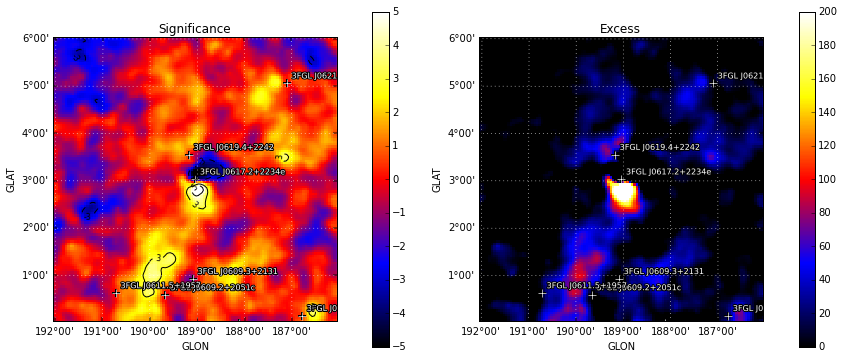

In [8]:
o = resid
from fermipy.plotting import ROIPlotter
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121)
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=0,vmax=200,subplot=122)
plt.gca().set_title('Excess')

In [9]:
resid_noj0621 = gta.residmap('ic443_roifit_noj0621',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['3FGL J0621.0+2514'])


2016-03-17 00:03:27 INFO     GTAnalysis.residmap(): Generating residual maps
2016-03-17 00:03:27 INFO     GTAnalysis.add_source(): Adding source residmap_testsource
2016-03-17 00:03:32 INFO     GTAnalysis.delete_source(): Deleting source residmap_testsource
2016-03-17 00:03:40 INFO     GTAnalysis.residmap(): Finished residual maps


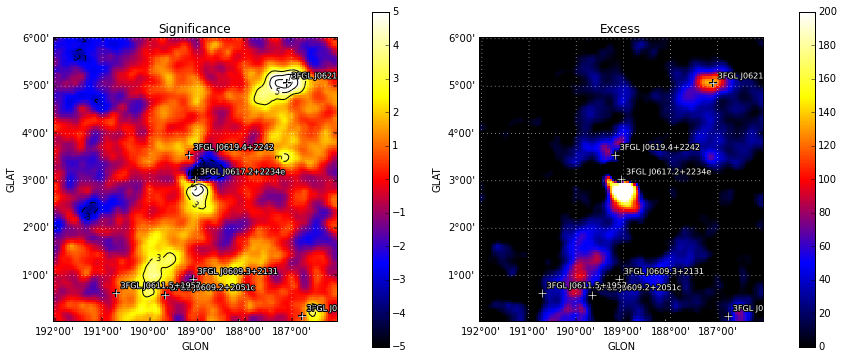

In [11]:
o = resid_noj0621
from fermipy.plotting import ROIPlotter
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121)
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=0,vmax=200,subplot=122)
plt.gca().set_title('Excess')

## Measuring Source Extension

After optimizing the model we are ready to run an extension analysis on IC 443.  As reported in [Abdo et al. 2010](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1002.2198), this source has a spatial extension of 0.27 deg $\pm$ 0.01 (stat).  We can run an extension test of this source by calling the *extension* method with the source name.  The extension method has a number of options which can be used to modify its behavior.  To see the default settings we can look at the extension sub-dictionary of the config property of our GTAnalysis instance.

In [12]:
import pprint
pprint.pprint(gta.config['extension'])

{'fix_background': False,
 'save_model_map': False,
 'save_templates': False,
 'spatial_model': 'GaussianSource',
 'width': None,
 'width_max': 1.0,
 'width_min': 0.00316,
 'width_nstep': 26}


By default the method will use a 2D Gaussian source template and scan the width parameter between 0.00316 and 1 degrees in 26 steps.  The *width* parameter can be used to provide an explicit  vector of points for the scan.  Since we know the extension of IC 443 is well localized around 0.27 deg we use a width vector centered around this point.  The analysis results are returned as an output dictionary and are also written to the internal source object of the GTAnalysis instance.

In [13]:
ext_gauss = gta.extension('ic443',width=np.linspace(0.25,0.30,11))
gta.write_roi('ext_gauss_fit')

2016-03-17 00:04:26 INFO     GTAnalysis.extension(): Starting
2016-03-17 00:04:26 INFO     GTAnalysis.extension(): Running analysis for 3FGL J0617.2+2234e
2016-03-17 00:05:22 INFO     GTAnalysis.extension(): Best-fit extension: 0.2749 + 0.0037 - 0.0038
2016-03-17 00:05:22 INFO     GTAnalysis.extension(): TS_ext:        4124.279
2016-03-17 00:05:22 INFO     GTAnalysis.extension(): Extension UL: 0.2811
2016-03-17 00:05:22 INFO     GTAnalysis.extension(): Refitting extended model
2016-03-17 00:05:22 INFO     GTAnalysis.add_source(): Adding source 3fgl_j0617.2+2234e_ext
2016-03-17 00:05:29 INFO     GTAnalysis.delete_source(): Deleting source 3fgl_j0617.2+2234e_ext
2016-03-17 00:05:29 INFO     GTAnalysis.extension(): Finished
2016-03-17 00:05:29 INFO     GTBinnedAnalysis.write_xml(): Writing /Users/mdwood/fermi/fermipy/notebooks/ic443/ext_gauss_fit_00.xml...
2016-03-17 00:05:29 INFO     GTBinnedAnalysis.generate_model_map(): Generating model map for component 00.
2016-03-17 00:05:36 INFO   

To inspect the results of the analysis we can make a plot of the likelihood profile.  From this we can see that the spatial extension is in good agreement with the value from Abdo et al. 2010.  

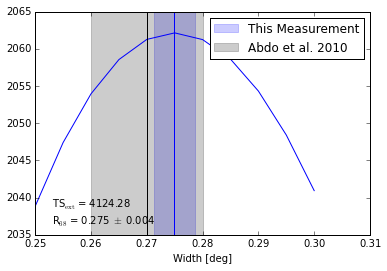

In [14]:
plt.figure()
plt.plot(ext_gauss['width'],ext_gauss['dlogLike'])
plt.gca().set_xlabel('Width [deg]')
plt.gca().set_ylabel('Delta Log-Likelihood')
plt.gca().axvline(ext_gauss['ext'])
plt.gca().axvspan(ext_gauss['ext']-ext_gauss['ext_err_lo'],ext_gauss['ext']+ext_gauss['ext_err_hi'],
                      alpha=0.2,label='This Measurement',color='b')

plt.gca().axvline(0.27,color='k')
plt.gca().axvspan(0.27-0.01,0.27+0.01,alpha=0.2,label='Abdo et al. 2010',color='k')

plt.annotate('TS$_{\mathrm{ext}}$ = %.2f\nR$_{68}$ = %.3f $\pm$ %.3f'%
            (ext_gauss['ts_ext'],ext_gauss['ext'],ext_gauss['ext_err']),xy=(0.05,0.05),xycoords='axes fraction')
plt.gca().legend()

As an additional cross-check we can look at what happens when we free nearby sources and rerun the extension analysis.

In [15]:
gta.free_sources(distance=1.0,pars='norm')
ext_gauss_free = gta.extension('ic443',width=np.linspace(0.25,0.30,11))
print 'Fixed Sourcs: %f +/- %f'%(ext_gauss['ext'],ext_gauss['ext_err'])
print 'Free Sourcs: %f +/- %f'%(ext_gauss_free['ext'],ext_gauss_free['ext_err'])

2016-03-17 00:08:59 INFO     GTAnalysis.extension(): Starting
2016-03-17 00:08:59 INFO     GTAnalysis.extension(): Running analysis for 3FGL J0617.2+2234e
2016-03-17 00:10:32 INFO     GTAnalysis.extension(): Best-fit extension: 0.2744 + 0.0039 - 0.0039
2016-03-17 00:10:32 INFO     GTAnalysis.extension(): TS_ext:        3922.036
2016-03-17 00:10:32 INFO     GTAnalysis.extension(): Extension UL: 0.2808
2016-03-17 00:10:32 INFO     GTAnalysis.extension(): Refitting extended model
2016-03-17 00:10:32 INFO     GTAnalysis.add_source(): Adding source 3fgl_j0617.2+2234e_ext
2016-03-17 00:10:46 INFO     GTAnalysis.delete_source(): Deleting source 3fgl_j0617.2+2234e_ext
2016-03-17 00:10:46 INFO     GTAnalysis.extension(): Finished


Fixed Sourcs: 0.274948 +/- 0.003749
Free Sourcs: 0.274418 +/- 0.003884
